In [1]:
library("Iso")

Iso 0.0-17


In [2]:
#This data was from nielsen and cassa, chimp human
mx <- c(214, 262, 251, 202, 146, 98, 46, 27, 32, 10, 7, 6, 2, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1)
#This data is from the nature paper
mx<-c(35551, 1495, 364, 109, 33, 16, 4, 2)


#This data is again from nature paper, but after i understood diploidy
mx.sjk<-c( 27059, 6989, 2378, 783, 223, 62, 29, 7, 8, 1)
mx.hanChinese<-c( 26887, 7091, 2427, 764, 264, 66, 38, 5, 7, 1)
mx.venter<-c( 16437, 4355, 1441, 428, 128, 41, 13, 5, 2)
mx.na12891<-c( 25763, 7917, 2615, 858, 277, 74, 27, 11, 7, 1)
mx.na18507<-c( 22478, 9809, 3483, 1200, 398, 120, 47, 13, 3, 1)
mx.abt<-c( 21756, 9400, 3211, 1006, 319, 86, 27, 10, 3, 1)
mx.kb1<-c( 17395, 7945, 2760, 952, 277, 115, 24, 13, 4, 1)

In [3]:
returnInvVar<-function(mx, CUTOFF){
    minPt = 0
    maxPt = length(mx)-1
    numWeights<-mx[-1]
    denomWeights<-mx[-length(mx)]
    InvVarEstimate<-mapply(function(x,y,z) ((z+1)^2*(x^2/y^2)*(1/x + 1/y))^(-1), numWeights, denomWeights, minPt:(maxPt-1))
    #We only consider points with cutoff greater than CUTOFF
    tabl<-sapply(minPt:maxPt,
               function(x) ifelse(1/InvVarEstimate[x + 1 - minPt] < CUTOFF & !is.na(InvVarEstimate[x+1-minPt]),
                                  (x+1)*mx[x + 2 - minPt] / mx[x+1-minPt], NA))
    print("before isotonic regression")
    print(tabl)
    #Isotonic regression
    pav<-pava(tabl[!is.na(tabl)], InvVarEstimate[!is.na(tabl)], decreasing=FALSE, long.out=FALSE, stepfun=FALSE)
    tabl[!is.na(tabl)]<-pav
    print("after isotonic regression")
    print(tabl)
    return(tabl)
}

In [4]:
tabl<-returnInvVar(mx.sjk, .1)

[1] "before isotonic regression"
 [1] 0.2582874 0.6804979 0.9878049 1.1392082 1.3901345        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.2582874 0.6804979 0.9878049 1.1392082 1.3901345        NA        NA
 [8]        NA        NA        NA


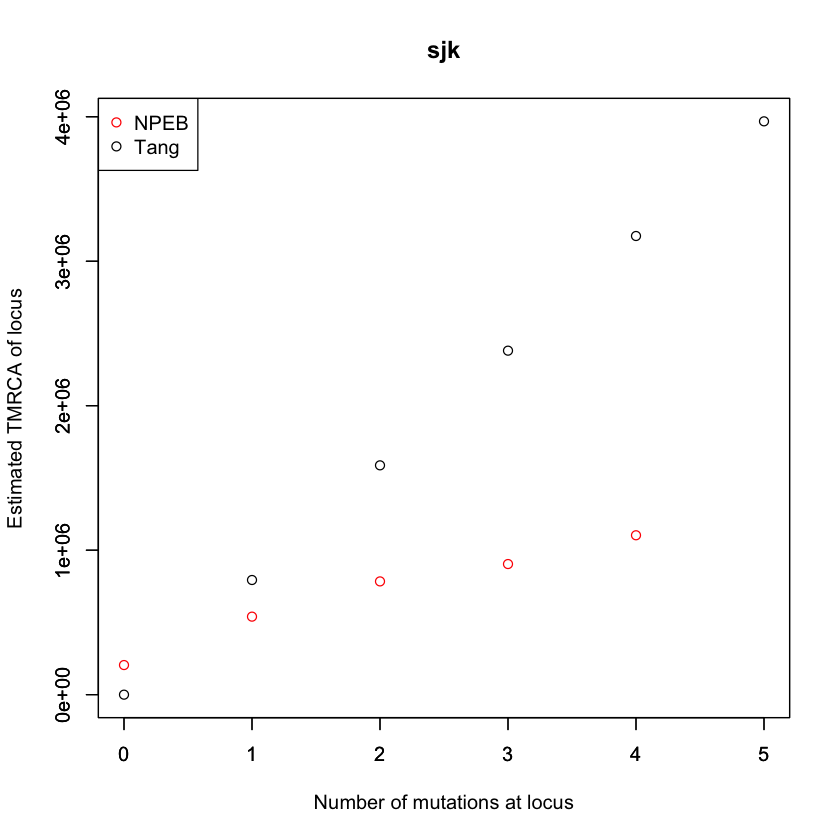

In [5]:
makePlot<-function(tabl, titl){
    tabl.inyears<-tabl/(2*0.7*10^(-9)*900)
    tabl.inyears<-tabl.inyears[1:6]
    scaled.muts<- 0:(length(tabl.inyears)-1)/(2*0.7*10^(-9)*900)
    ylimRange<-c(min(tabl.inyears,scaled.muts, na.rm = TRUE), max(tabl.inyears, scaled.muts, na.rm = TRUE))
    tabl
    plot(0:(length(tabl.inyears)-1),tabl.inyears, xlab = "Number of mutations at locus", ylab="Estimated TMRCA of locus", col="red", pch= 1,
        ylim=ylimRange)
    par(new=T)
    plot(0:(length(tabl.inyears)-1),scaled.muts, xlab="", ylab="", ylim=ylimRange)
    legend(x="topleft", c("NPEB", "Tang"), col=c("red","black"), pch=1)
    title(titl)
}
makePlot(tabl, "sjk")

In [6]:
avg.sjk<-sum(mx.sjk*(0:(length(mx.sjk)-1)))/sum(mx.sjk)
avg.hanChinese<-sum(mx.hanChinese*(0:(length(mx.hanChinese)-1)))/sum(mx.hanChinese)
avg.venter<-sum(mx.venter*(0:(length(mx.venter)-1)))/sum(mx.venter)
avg.na18507<-sum(mx.na18507*(0:(length(mx.na18507)-1)))/sum(mx.na18507)
avg.abt<-sum(mx.abt*(0:(length(mx.abt)-1)))/sum(mx.abt)
avg.kb1<-sum(mx.kb1*(0:(length(mx.kb1)-1)))/sum(mx.kb1)

avg.sjk
avg.hanChinese
avg.kb1
avg.venter
avg.na18507
avg.abt
avg.kb1

[1] 0.4153547

[1] 0.4247936

[1] 0.6199552

[1] 0.4099344

[1] 0.611765

[1] 0.5810045

[1] 0.6199552

[1] "korean"
[1] "before isotonic regression"
 [1] 0.2582874 0.6804979 0.9878049 1.1392082 1.3901345        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.2582874 0.6804979 0.9878049 1.1392082 1.3901345        NA        NA
 [8]        NA        NA        NA


[1] 344170.3

[1] "hanChinese"
[1] "before isotonic regression"
 [1] 0.2637334 0.6845297 0.9443758 1.3821990 1.2500000        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.2637334 0.6845297 0.9443758 1.3494694 1.3494694        NA        NA
 [8]        NA        NA        NA


[1] 351178.6

[1] "yoruban"
[1] "before isotonic regression"
 [1] 0.4363822 0.7101641 1.0335917 1.3266667 1.5075377        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.4363822 0.7101641 1.0335917 1.3266667 1.5075377        NA        NA
 [8]        NA        NA        NA


[1] 479263.8

[1] "European"
[1] "before isotonic regression"
[1] 0.2649510 0.6617681 0.8910479 1.1962617 1.6015625        NA        NA
[8]        NA        NA
[1] "after isotonic regression"
[1] 0.2649510 0.6617681 0.8910479 1.1962617 1.6015625        NA        NA
[8]        NA        NA


[1] 339380.9

[1] "San"
[1] "before isotonic regression"
 [1] 0.4567404 0.6947766 1.0347826 1.1638655 2.0758123 1.2521739        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.4567404 0.6947766 1.0347826 1.1638655 1.7449263 1.7449263        NA
 [8]        NA        NA        NA


[1] 479612.9

[1] "Bantu"
[1] "before isotonic regression"
 [1] 0.4320647 0.6831915 0.9398941 1.2683897 1.3479624        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.4320647 0.6831915 0.9398941 1.2683897 1.3479624        NA        NA
 [8]        NA        NA        NA


[1] 458706.7

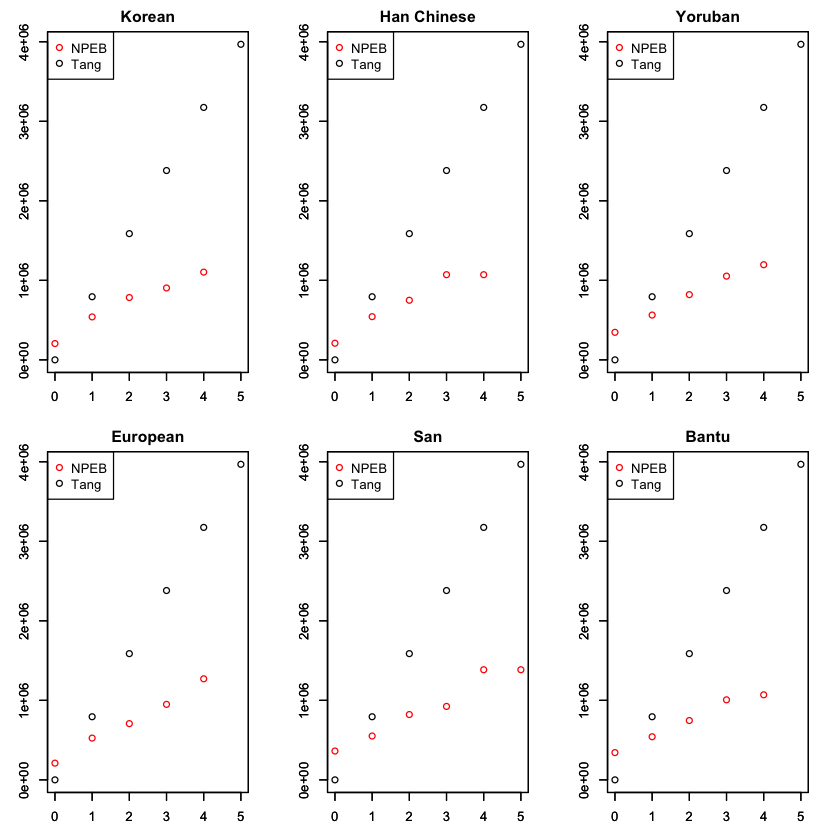

In [7]:
#png(filename="../../Dropbox/20150115_Bayesian_Approach_To_Coal/Gronau.png",width = 800, height = 800,
#    units = "px", pointsize = 12, bg = "white", res = 110)
par(mfrow=c(2,3), mar = c(3,3,2,2))

pop.tmrcas.average=c() #the tmrca for sites with an average number of mutations

print("korean")
tabl<-returnInvVar(mx.sjk, .1)
(avg.sjk*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.sjk*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "Korean")


print("hanChinese")
tabl<-returnInvVar(mx.hanChinese, .1)
(avg.hanChinese*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.hanChinese*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "Han Chinese")

#tabl<-returnInvVar(mx.na12891, .1)
#makePlot(tabl, "na12891")
print("yoruban")
tabl<-returnInvVar(mx.na18507, .1)
(avg.na18507*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.na18507*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "Yoruban")

print("European")
tabl<-returnInvVar(mx.venter, .1)
(avg.venter*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.venter*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "European")

print("San")
tabl<-returnInvVar(mx.kb1, .1)
(avg.kb1*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.kb1*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "San")

print("Bantu")
tabl<-returnInvVar(mx.abt, .1)
(avg.abt*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900)
pop.tmrcas.average<-c(pop.tmrcas.average,(avg.abt*(tabl[2] - tabl[1]) + tabl[1])/(2*0.7*10^(-9)*900))
makePlot(tabl, "Bantu")

#dev.off()

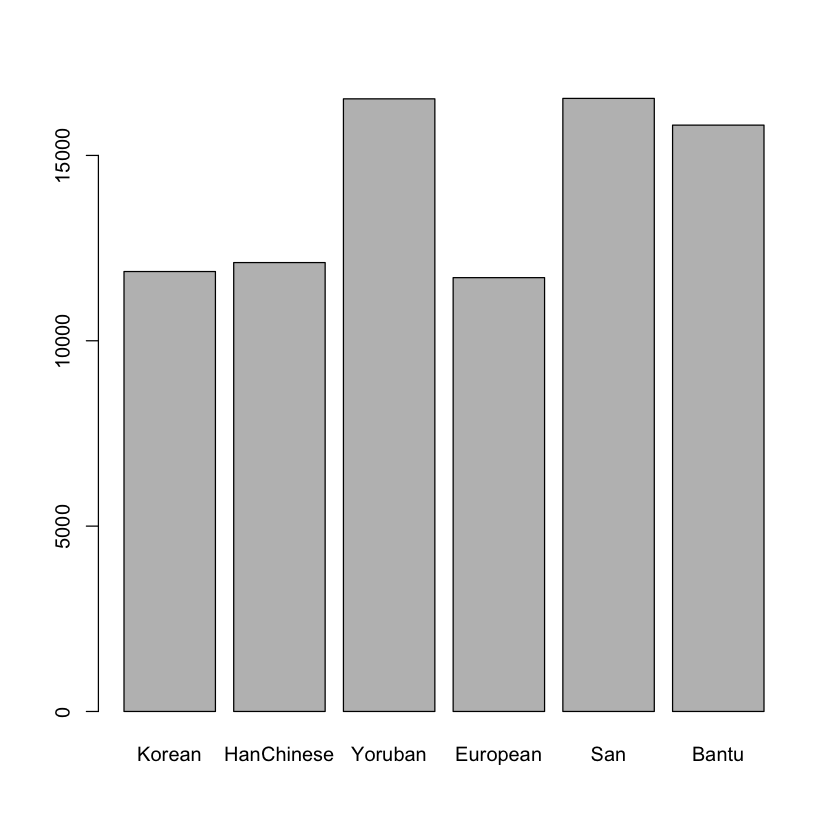

In [84]:
#time in generations
barplot(pop.tmrcas.average/29,names.arg=c("Korean", "HanChinese", "Yoruban","European","San", "Bantu"))

In [9]:
pop.tmrcas.average

[1] 344170.3 351178.6 479263.8 339380.9 479612.9 458706.7

[1] "before isotonic regression"
 [1] 0.4320647 0.6831915 0.9398941 1.2683897 1.3479624        NA        NA
 [8]        NA        NA        NA
[1] "after isotonic regression"
 [1] 0.4320647 0.6831915 0.9398941 1.2683897 1.3479624        NA        NA
 [8]        NA        NA        NA


[1] 0.4320647 0.6831915 0.9398941 1.2683897 1.3479624        NA        NA
 [8]        NA        NA        NA

[1] "before isotonic regression"
[1] 0.2649510 0.6617681 0.8910479 1.1962617 1.6015625        NA        NA
[8]        NA        NA
[1] "after isotonic regression"
[1] 0.2649510 0.6617681 0.8910479 1.1962617 1.6015625        NA        NA
[8]        NA        NA


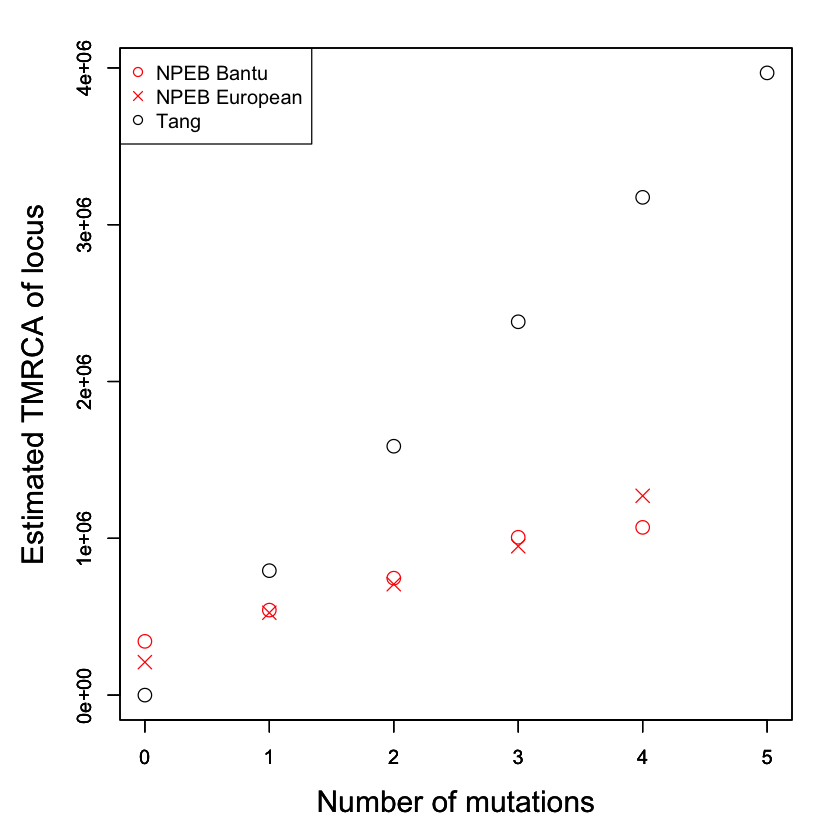

In [91]:
#png(filename="../../Dropbox/20150115_Bayesian_Approach_To_Coal/BantuEurComparison.png",width = 800, height = 800,
#    units = "px", pointsize = 12, bg = "white", res = 110)

par( mar = c(5,5,2,2))

#tabl<-returnInvVar(mx.na18507, .15)
tabl<-returnInvVar(mx.abt,.15)
tabl.inyears<-tabl/(2*0.7*10^(-9)*900)
tabl.inyears<-tabl.inyears[1:6]

scaled.muts<- 0:(length(tabl.inyears)-1)/(2*0.7*10^(-9)*900)
ylimRange<-c(min(tabl.inyears,scaled.muts, na.rm = TRUE), max(tabl.inyears, scaled.muts, na.rm = TRUE))
tabl
plot(0:(length(tabl.inyears)-1),tabl.inyears, xlab = "Number of mutations", ylab="Estimated TMRCA of locus", col="red", pch= 1,
    ylim=ylimRange, cex=1.5, cex.lab=1.5)
par(new=T)
plot(0:(length(tabl.inyears)-1),scaled.muts, xlab="", ylab="", ylim=ylimRange, cex=1.5)

tabl<-returnInvVar(mx.venter, .15)
tabl.inyears<-tabl/(2*0.7*10^(-9)*900)
tabl.inyears<-tabl.inyears[1:6]
par(new=T)
plot(0:(length(tabl.inyears)-1),tabl.inyears, xlab = "Number of mutations", ylab="Estimated TMRCA of locus", col="red", pch= 4,
    ylim=ylimRange, cex=1.5,cex.lab=1.5)
legend(x="topleft", c("NPEB Bantu","NPEB European", "Tang"), col=c("red","red","black"), pch=c(1,4,1))


#dev.off()

[1] 10

[1] 10

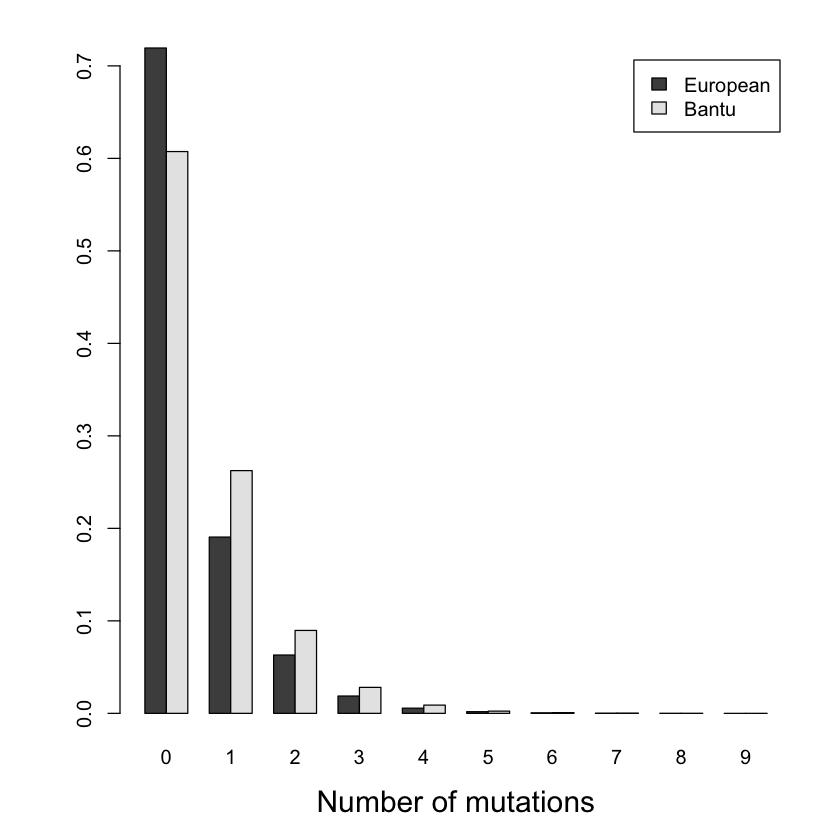

In [83]:
#png(filename="../../Dropbox/20150115_Bayesian_Approach_To_Coal/BantuEurBarplot.png",width = 800, height = 500,
#    units = "px", pointsize = 12, bg = "white", res = 110)

par( mar = c(5,5,2,2))

#barplot
counts.abt<-mx.abt/sum(mx.abt)
counts.venter<-c(mx.venter/sum(mx.venter),0)

length(counts.abt)
length(counts.venter)

barplot(rbind(counts.venter, counts.abt),beside = TRUE,
       names.arg=0:9, legend=c("European","Bantu"), xlab="Number of mutations", cex.lab=1.5)

#dev.off()

[1]  0.18432462 -0.27374764 -0.29652134 -0.33308108 -0.37100595 -0.25266958
 [7] -0.24524354 -0.21621444  0.04504741 -1.00000000

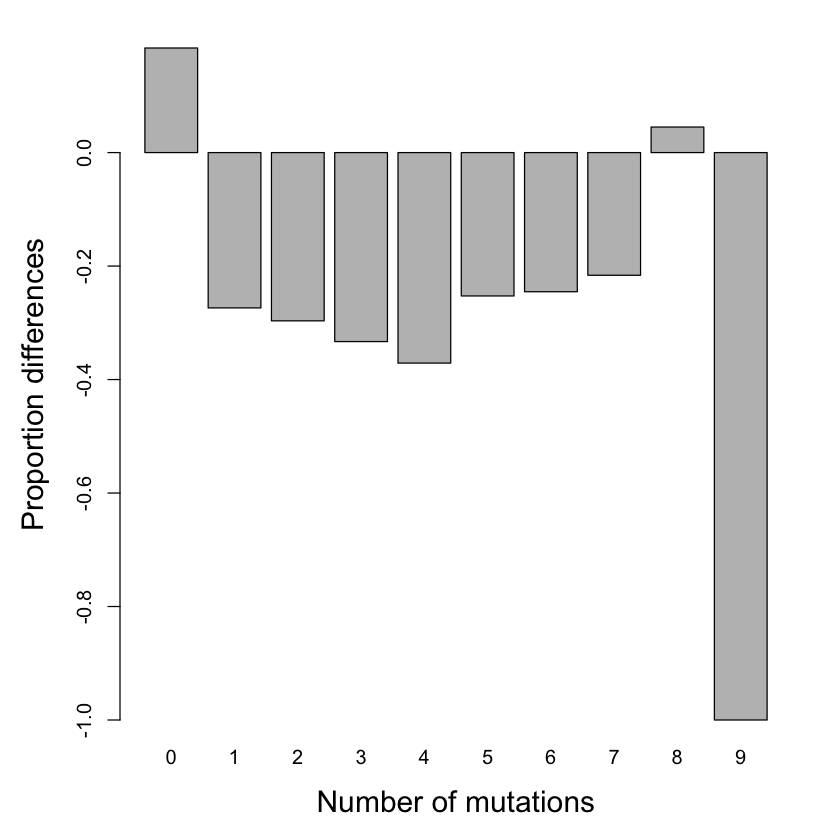

In [92]:
par( mar = c(5,5,2,2))

#barplot
proportion.diffs<-(counts.venter-counts.abt)/counts.abt
proportion.diffs

barplot(proportion.diffs,names.arg=0:9, xlab="Number of mutations", ylab="Proportion differences", cex.lab=1.5)

In [128]:
0:length(mx.sjk-1)

[1]  0  1  2  3  4  5  6  7  8  9 10

In [29]:
#This if for the nautre paper data
tabl*25/(2* 2*10^(-8)*2*843)

#This is the sum using the nature paper data
sum(minPt:maxPt * mx)/sum(mx)


(361029-31177)*0.0745196146271358 + 31177

#compare to non npeb estimates

[1]  15588.77 180514.72 333018.85 448920.96        NA        NA        NA
[8]        NA

[1] 0.07451961

[1] 55757.44

Mu*l = 0.00001  
2Mu*l = 0.00002

In [11]:
tabl/0.00002

[1]  61214.95  95801.53 120717.13 144554.46        NA        NA        NA
 [8]        NA        NA        NA        NA        NA        NA        NA
[15]        NA        NA        NA        NA        NA        NA        NA
[22]        NA        NA        NA        NA        NA        NA        NA
[29]        NA        NA        NA        NA        NA        NA        NA
[36]        NA

This would be generations, let's take a generation to be 30 years ???? (It will be different for humans and chimps). Also, will mutation rates be differnt for humans and chimps?  Have we measured mutation rate correctly?

In [24]:
tabl * 30/0.00001

[1] 3672897 5748092 7243028 8673267      NA      NA      NA      NA      NA
[10]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[19]      NA      NA      NA      NA      NA      NA      NA      NA      NA
[28]      NA      NA      NA      NA      NA      NA      NA      NA      NA

That gives us something between 1.5 million and 3.6 million

http://www.pnas.org/content/109/39/15716.full

In [18]:
minPt:maxPt / 0.00002 * 30

[1]        0  1500000  3000000  4500000  6000000  7500000  9000000 10500000
 [9] 12000000 13500000 15000000 16500000 18000000 19500000 21000000 22500000
[17] 24000000 25500000 27000000 28500000 30000000 31500000 33000000 34500000
[25] 36000000 37500000 39000000 40500000 42000000 43500000 45000000 46500000
[33] 48000000 49500000 51000000 52500000

In [23]:
sum(minPt:maxPt * mx)/sum(mx)

[1] 2.737243

In [22]:
minPt:maxPt * mx

[1]   0 262 502 606 584 490 276 189 256  90  70  66  24  39  14  30  16   0   0
[20]  19   0   0   0   0   0   0  26   0   0   0   0   0   0   0   0  35

take into consideration included in restrictive data set
look at genes that have more base pairs in nielsen than in cassa

Merged=Merged[Merged['bp'] < 20000]

Choose some L, for example 500 bp(might want to be shorter if illustrating diff with Tang), then remove all genes that have too high or too low a mutation rate.

million base pairs could be smaller.  because you’re waiting a long time for chimps and humans before they come back together.  million base pairs is for humans.

Ne for humans is 10 000


Remove N, R, Y, (X, ?) always removed.
if you’re skipping over base pairs, then recombination rate will be higher

Ralph comment, looking at some kind of average

chimp genome paper, line up chimp genome and humans genome and count all differences.  so they’re taking the average across sites.

In paper John sent, references chimp genome paper.  There are going to be whole genome estimates of divergence time between humans and chimps.

Ask Cassa
Let's say missense mutations are highly constrained.  You should just be using synon mutation rate at the genes.  It might be 2/3 of current mutation rate you are using.

chimp genome paper, line up chimp genome and humans genome and count all differences.  so they’re taking the average across sites.

If you’re looking for simply average divergence time, doesn’t it make sense to shuffle up nucleotides?  That should give you mean divergence.  and you would have a more accurate mutation rate because it would be an average.

Really the method should be used when you’re trying to measure the TMRCA of a single ancestor, no?  Or maybe it’s worth saying that it gives you about the right mean, but then that we have better results for estimating the particular time at different genes, like genes with 0, 1, 2, etc mutations.

but then because of issue of recombination, it’s somewhat equivalent to the composite idea.  